**Zadanie: kupujemy mieszkanie**

In [ ]:
"""
1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

120.000 zł - aktualna cena mieszkania
przez następne 5 lat ceny mają rosnąć 5% rocznie

oferta lokaty: dopłacanie stałej kwoty na koniec każdego mc (5x12 = 60 mc przez 5 lat), 12% roczna stopa procentowa z kapitalizacją miesięczną
"""


In [ ]:
pip install numpy numpy-financial matplotlib

In [111]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt


price = 120000
years = 5
price_increase = 0.05

rate = 0.12 # oprocentowanie lokaty (roczne)
freq = 12 # liczb kapitalizcji w ciągu roku
rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów


In [115]:
#zad1 - rozwizanie
# logika na finalną cenę: final_price = round((price*(1+price_increase)**years),2)

final_price = round((npf.fv(price_increase, years, 0, -price)),2)
print(f'Cena po 5 latach cena mieszkania wyniesie {final_price} zł')

Cena po 5 latach cena mieszkania wyniesie 153153.79 zł


In [113]:
#zad2 - rozwiązanie
#PV (obecna wartość): 0 zł (dopłacasz pewna stałą kwotę na koniec każdego miesiąca).
monthly_payment = abs(round((npf.pmt(rate, nper, 0, final_price)),2))
print(f"Aby osiągnąć {final_price} zł po 5 latach, musisz wpłacać {monthly_payment} zł co miesiąc.")

Aby osiągnąć 153153.79 zł po 5 latach, musisz wpłacać 1875.28 zł co miesiąc.


Text(0, 0.5, 'Wartość')

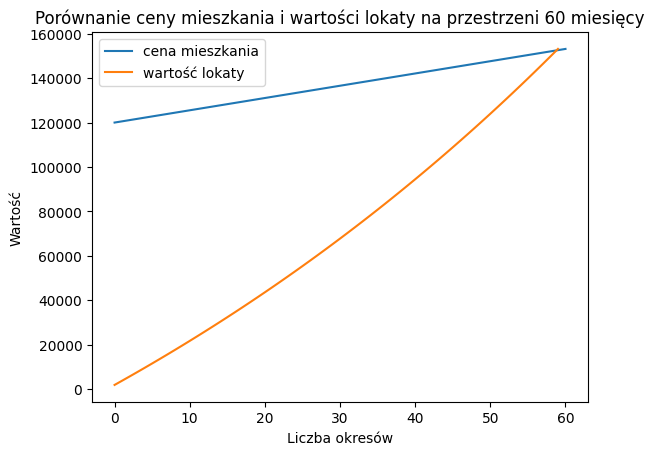

In [114]:
#zad3 - rozwiąznie
periods = np.arange(1,nper+1,dtype=int)

#odsetki_mieszkanie = np.around(np.zeros(nper)+((final_price-price)/nper),2) # brane tylko pod uwagę to co ponad starową wartość (price)
dane_mieszkanie = np.linspace(price, final_price, nper + 1)

dane_lokata = -np.around(npf.fv(rate, periods-1, 0, monthly_payment),2)


plt.plot(dane_mieszkanie,label='cena mieszkania')
plt.plot(dane_lokata.cumsum(),label='wartość lokaty')
plt.title('Porównanie ceny mieszkania i wartości lokaty na przestrzeni 60 miesięcy')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Wartość')